In [1]:
!pip install xlrd
!pip install numpy
!pip install tabulate
!pip install datetime 
!pip install networkx
!pip install matplotlib
!pip install folium

You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 10.0.1, however version 20.0.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# import Cellyzer

In [2]:
import cellyzer as cz

# read message data csv file

In [3]:
msg_file_path = "dataset/my_test_data/messages.csv"
messageDataSet = cz.read_msg(msg_file_path)

[x]  Reading Message Data...
[x]  Objects creation successful



         user: 2 record(s) with incomplete values
         other: 2 record(s) with incomplete values
         direction: 2 record(s) with incomplete values
         length: 2 record(s) with incomplete values
         timestamp: 2 record(s) with incomplete values


# print data set

In [4]:
cz.utils.print_dataset(messageDataSet, name="Message Dataset")


 >>> Message Dataset :
+----+------------+-------------+------------+---------+--------------------------------+
|    |   _user    | _other_user | _direction | _length |           _timestamp           |
+----+------------+-------------+------------+---------+--------------------------------+
| 1  | 7610039694 | 7684763671  |  Incoming  |   28    | Wed Sep 15 19:01:54 +0100 2010 |
| 2  | 7641036117 | 7681546436  |  Incoming  |    7    | Mon Feb 11 07:08:49 +0000 1980 |
| 3  | 7641036117 | 7681546436  |  Outgoing  |    6    | Mon Feb 11 07:14:05 +0000 1980 |
| 4  | 7641036117 | 7981267897  |  Outgoing  |   41    | Thu Sep 09 21:43:44 +0100 2010 |
| 5  | 7981267897 | 7784425582  |  Outgoing  |   75    | Mon Jan 07 22:58:28 +0000 1980 |
| 6  | 7981267897 | 7784425582  |  Incoming  |   33    | Thu Sep 09 18:53:25 +0100 2010 |
| 7  | 7981267897 | 7784425582  |  Outgoing  |   90    | Thu Sep 09 18:59:35 +0100 2010 |
| 8  | 7981267897 | 7784425582  |  Incoming  |   30    | Thu Sep 09 19:06:06

# get all users

In [5]:
all_users = messageDataSet.get_all_users()
print("All Users : %s \n" % all_users)

All Users : ['7610039694', '7684763671', '7641036117', '7681546436', '7981267897', '7784425582', '7033434266', '7817341678', '7541477895'] 



In [6]:
search_user1 = "7681546436"
search_user2 = "7641036117"

# get all connected users of a specific user

In [7]:
connected_users = messageDataSet.get_connected_users(search_user1)
print("Users connected to %s : %s \n" % (search_user1, connected_users))

Users connected to 7681546436 : ['7641036117', '7981267897'] 



# get records between two selected users

In [8]:
user_record_list = messageDataSet.get_records(search_user1, search_user2)
cz.utils.print_record_lists(user_record_list)

{'_user': '7641036117', '_other_user': '7681546436', '_direction': 'Incoming', '_length': '7', '_timestamp': 'Mon Feb 11 07:08:49 +0000 1980'}
{'_user': '7641036117', '_other_user': '7681546436', '_direction': 'Outgoing', '_length': '6', '_timestamp': 'Mon Feb 11 07:14:05 +0000 1980'}


In [9]:
user_message_dataset = cz.MessageDataSet(user_record_list)
cz.utils.print_dataset(user_message_dataset, name="User Records of %s" % search_user1 + " & " + search_user2)



 >>> User Records of 7681546436 & 7641036117 :
+---+------------+-------------+------------+---------+--------------------------------+
|   |   _user    | _other_user | _direction | _length |           _timestamp           |
+---+------------+-------------+------------+---------+--------------------------------+
| 1 | 7641036117 | 7681546436  |  Incoming  |    7    | Mon Feb 11 07:08:49 +0000 1980 |
| 2 | 7641036117 | 7681546436  |  Outgoing  |    6    | Mon Feb 11 07:14:05 +0000 1980 |
+---+------------+-------------+------------+---------+--------------------------------+


# visualize connections between all users

In [10]:
messageDataSet.print_connection_matrix()

+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
|            | 7610039694 | 7684763671 | 7641036117 | 7681546436 | 7981267897 | 7784425582 | 7033434266 | 7817341678 | 7541477895 |
+------------+------------+------------+------------+------------+------------+------------+------------+------------+------------+
| 7610039694 |     .      |     1      |     .      |     .      |     .      |     .      |     .      |     .      |     .      |
| 7684763671 |     1      |     .      |     .      |     .      |     .      |     .      |     .      |     .      |     .      |
| 7641036117 |     .      |     .      |     .      |     2      |     4      |     .      |     .      |     .      |     .      |
| 7681546436 |     .      |     .      |     2      |     .      |     4      |     .      |     .      |     .      |     .      |
| 7981267897 |     .      |     .      |     4      |     4      |     .    

([['7610039694', '.', 1, '.', '.', '.', '.', '.', '.', '.'],
  ['7684763671', 1, '.', '.', '.', '.', '.', '.', '.', '.'],
  ['7641036117', '.', '.', '.', 2, 4, '.', '.', '.', '.'],
  ['7681546436', '.', '.', 2, '.', 4, '.', '.', '.', '.'],
  ['7981267897', '.', '.', 4, 4, '.', 33, 1, 1, 3],
  ['7784425582', '.', '.', '.', '.', 33, '.', '.', '.', '.'],
  ['7033434266', '.', '.', '.', '.', 1, '.', '.', '.', '.'],
  ['7817341678', '.', '.', '.', '.', 1, '.', '.', '.', '.'],
  ['7541477895', '.', '.', '.', '.', 3, '.', '.', '.', '.']],
 ['',
  '7610039694',
  '7684763671',
  '7641036117',
  '7681546436',
  '7981267897',
  '7784425582',
  '7033434266',
  '7817341678',
  '7541477895'])

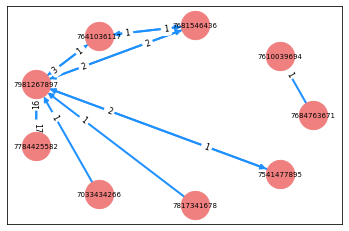

([['7684763671', '7610039694'],
  ['7681546436', '7641036117'],
  ['7641036117', '7681546436'],
  ['7641036117', '7981267897'],
  ['7981267897', '7784425582'],
  ['7784425582', '7981267897'],
  ['7981267897', '7784425582'],
  ['7784425582', '7981267897'],
  ['7981267897', '7784425582'],
  ['7784425582', '7981267897'],
  ['7981267897', '7784425582'],
  ['7784425582', '7981267897'],
  ['7784425582', '7981267897'],
  ['7981267897', '7784425582'],
  ['7681546436', '7981267897'],
  ['7981267897', '7681546436'],
  ['7681546436', '7981267897'],
  ['7981267897', '7681546436'],
  ['7641036117', '7981267897'],
  ['7981267897', '7784425582'],
  ['7784425582', '7981267897'],
  ['7981267897', '7784425582'],
  ['7784425582', '7981267897'],
  ['7033434266', '7981267897'],
  ['7817341678', '7981267897'],
  ['7541477895', '7981267897'],
  ['7981267897', '7541477895'],
  ['7541477895', '7981267897'],
  ['7981267897', '7784425582'],
  ['7641036117', '7981267897'],
  ['7981267897', '7641036117'],
  ['7784

In [11]:
messageDataSet.visualize_connection_network()